# Assignment 01 - Image Enhancement and Filtering

**Course:** SCC251 - Digital Image Processing

**Authors:** Ana Laura Chioca and Ana Luisa Costa

In [0]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [0]:
def error(f, r):
    """Computing error from image reference to processed image"""  
    return np.sqrt(np.sum(np.square(np.subtract(f.astype(np.float32), r.astype(np.float32))))) 

def G(x, sigma):
    """Gaussian kernel equation"""
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-((x)**2 / (2 * sigma**2)))

def E(x, y):
    """Calculates euclidean distance between two points"""
    return np.sqrt(x**2 + y**2)

def bilateral_filter(img, n, s, r):
    """Function to apply bilateral filter, smoothing the image while preserving its edges
    Parameters:
        n - size of filter
        s - spatial Gaussian
        r - range Gaussian
    """
    
    "Calculating padding necessary to process all pixels from image"
    a = int((n-1)/2)
    b = int((n-1)/2)
    
    "Padding image with zeros"
    img = np.pad(img, ((a,a),(b,b)), 'constant')
    
    "Converting image to type float64 in order to process it"
    img = img.astype(np.float64)
    
    "New array to stored filtered image"
    img_mod = np.zeros(img.shape, dtype=np.float32)
    
    N, M = img.shape
    gs = np.zeros((n,n))
    gr = np.zeros((n,n))
    
    "Computing the spatial Gaussian component"
    for x in range(n):
        for y in range(n):
            gs[x,y] = G(E(x-a,y-b), s)
            
    "Convolving the original image r with the chosen kernel"
    for x in range(a, N-a):
        for y in range(b, M-b):
            subimg = img[x-a : x+a+1 , y-b : y+b+1]
            I = img[x,y]
            W = 0
            for u in range(n): 
                for v in range(n):
                    gr[u,v] = G(subimg[u,v]-I, r)
            w = np.multiply(gr,gs)
            W = np.sum(w)
            I = np.sum(np.multiply(w,subimg))
            img_mod[x,y] = I / W

    
    img_mod = img_mod[a:N-a, b:M-b]

    return img_mod.astype(np.uint8)

def unsharp_mask(img, c, k):
    n, m = k.shape
    a = int((n - 1) / 2)
    b = int((m - 1) / 2)
    
    # Converting image to type float64 in order to process it and padding it with zeros
    img = img.astype(np.float32)
    img = np.pad(img, ((a,a),(b,b)), 'constant')
    
    # New array to store filtered image
    filtered_img = np.array(img, copy=True)

    N, M = img.shape
    
    # Convolving the original image r with the chosen kernel
    for x in range(a, N - a):
        for y in range(b, M - b):
            subimg = img[x-a : x+a+1, y-b : y+b+1]
            filtered_img[x, y] = np.sum(np.multiply(subimg, k))
            
    # Image Scaling:
    filtered_img = (((filtered_img - filtered_img.min()) * 255) / filtered_img.max())

    # Adding the filtered image, multiplied by the parameter c, back to the original image:
    filtered_img = (c * (filtered_img)) + img
    
    # Image Scaling:
    filtered_img = (((filtered_img - filtered_img.min()) * 255) / filtered_img.max())
    

    filtered_img = filtered_img[a:N-a, b:M-b]

    return filtered_img.astype(np.uint8)

def vignette_filter(img, row, col):
    'Function that applies Vignette filter'

    #row = float(input())  # parâmetro row
    #col = float(input())  # parâmetro col

    'Converting image to type float64 in order to process it'
    img = img.astype(np.float64)

    'New array to stored filtered image'
    img_mod = np.zeros(img.shape, dtype=np.float64)

    a, b = img.shape
    k1 = np.zeros(a)
    k2 = np.zeros(b)

    'Computing the Gaussian Kernel:'
    i = 0
    for x in range(-int((a - 1) / 2), int(((a - 1) / 2) + 1)):
        k1[i] = G(x, row)
        i += 1

    j = 0
    for x in range(-int((b - 1) / 2), int(((b - 1) / 2) + 1)):
        k2[j] = G(x, col)
        j += 1

    'Transposição:'
    k1_transp = k1.reshape(k1.shape + (1,))

    img_mod = np.zeros((a, b))
    prod = np.multiply(k1_transp, k2)
    img_mod = np.multiply(img, prod)

    'Image Scaling:'
    img_mod = ((img_mod - img_mod.min()) * 255) / img_mod.max()

    return img_mod.astype(np.uint8)

### Images and tests

In [0]:
img1 = imageio.imread("images/airplane.png")
img2 = imageio.imread("images/arara.png")
img3 = imageio.imread("images/camera.png")
img4 = imageio.imread("images/flower.png")
img5 = imageio.imread("images/moon.png")

k1 = np.array([[0, -1, 0],
               [-1, 4, -1],
               [0, -1, 0]])

k2 = np.array( [[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

t1 = bilateral_filter(img3, 3, 150.0, 100.0)
t2 = bilateral_filter(img5, 5, 50.0, 100.0)
t3 = unsharp_mask(img2, 0.5, k1)
t4 = unsharp_mask(img2, 0.75, k2)
t5 = vignette_filter(img4, 50.0, 50.0)
t6 = vignette_filter(img1, 30, 45)

err1 = error(t1, img3)
err2 = error(t2, img5)
err3 = error(t3, img2)
err4 = error(t4, img2)
err5 = error(t5, img4)
err6 = error(t6, img1)

### Example: bilateral filter

(-0.5, 149.5, 149.5, -0.5)

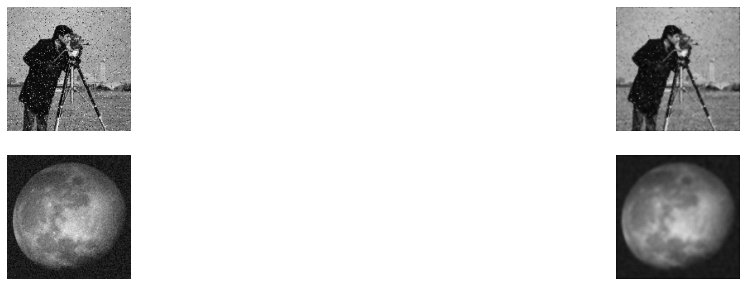

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(221)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(222)
plt.imshow(t1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img5, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(224)
plt.imshow(t2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

### Example: unsharp mask

4827.9673
6893.606


(-0.5, 299.5, 299.5, -0.5)

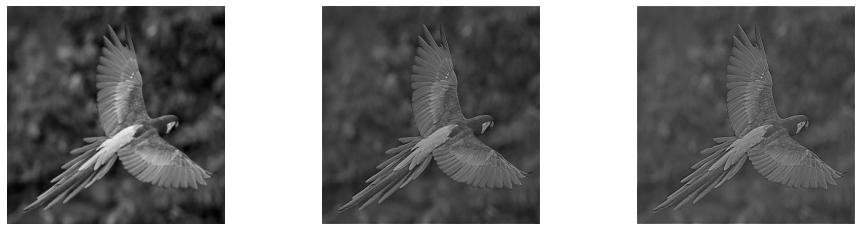

In [23]:
print(err3)
print(err4)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(132)
plt.imshow(t3, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(133)
plt.imshow(t4, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

### Example: vignette filter

(-0.5, 198.5, 170.5, -0.5)

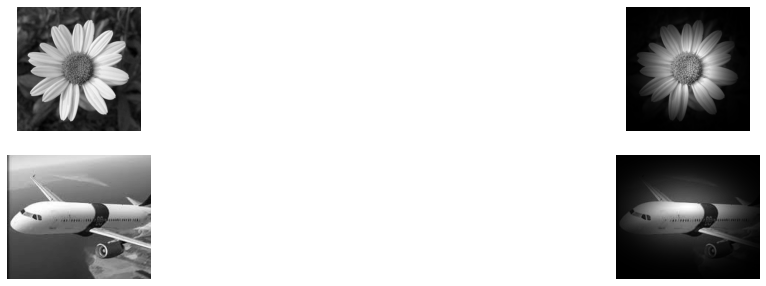

In [24]:
print(err5)
print(err6)

plt.figure(figsize=(20,5))
plt.subplot(221)
plt.imshow(img4, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(222)
plt.imshow(t5, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(224)
plt.imshow(t6, cmap="gray", vmin=0, vmax=255)
plt.axis('off')